# Introduction
**Dataset**: The data is a part of Amazon Business Research Analyst Dataset. It contains the information about agents delivering orders placed through their platform. <br>
**Objective**: The primary objective is to formulate a model which accurately forecasts the Time taken (in minutes) to deliver an order. <br>
**Methodology**: We start with analysing each of the three detasets to find the one relevant for our purpose. Then we move on to deciding the variables relevant for solving our purpose. Finally we develope models to forecast the Time taken for a delivery. The accuarcy for each model is judged by R2 score.


In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-business-research-analyst-dataset/cleaned_test.csv
/kaggle/input/amazon-business-research-analyst-dataset/encoded_cleaned_test.csv
/kaggle/input/amazon-business-research-analyst-dataset/updated.csv


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df=pd.read_csv('/kaggle/input/amazon-business-research-analyst-dataset/cleaned_test.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05,NaN,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian,object
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,object
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,object
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,17:20,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,object
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian,object


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11399 non-null  object 
 1   Delivery_person_ID           11399 non-null  object 
 2   Delivery_person_Age          10908 non-null  float64
 3   Delivery_person_Ratings      10892 non-null  float64
 4   Restaurant_latitude          11399 non-null  float64
 5   Restaurant_longitude         11399 non-null  float64
 6   Delivery_location_latitude   11399 non-null  float64
 7   Delivery_location_longitude  11399 non-null  float64
 8   Order_Date                   11399 non-null  object 
 9   Time_Orderd                  10955 non-null  object 
 10  Time_Order_picked            11399 non-null  object 
 11  Weather                      11241 non-null  object 
 12  Road_traffic_density         11245 non-null  object 
 13  Vehicle_conditio

In [58]:
df.isnull().sum()

ID                               0
Delivery_person_ID               0
Delivery_person_Age            491
Delivery_person_Ratings        507
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    444
Time_Order_picked                0
Weather                        158
Road_traffic_density           154
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            238
Festival                        65
City                           324
Name:                            0
dtype: int64

In [59]:
df_enc=pd.read_csv('/kaggle/input/amazon-business-research-analyst-dataset/encoded_cleaned_test.csv')
df_enc.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05,7,4,3,1,1,1.0,1.0,0,object
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,6,1,0,3,2,1.0,1.0,0,object
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10/3/2022,19:35,19:45,3,1,0,1,2,1.0,1.0,0,object
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,2/4/2022,17:15,17:20,1,3,1,2,3,1.0,1.0,0,object
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,4,3,2,1,3,1.0,1.0,0,object


In [60]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11399 non-null  object 
 1   Delivery_person_ID           11399 non-null  object 
 2   Delivery_person_Age          10908 non-null  float64
 3   Delivery_person_Ratings      10892 non-null  float64
 4   Restaurant_latitude          11399 non-null  float64
 5   Restaurant_longitude         11399 non-null  float64
 6   Delivery_location_latitude   11399 non-null  float64
 7   Delivery_location_longitude  11399 non-null  float64
 8   Order_Date                   11399 non-null  object 
 9   Time_Orderd                  10955 non-null  object 
 10  Time_Order_picked            11399 non-null  object 
 11  Weather                      11399 non-null  int64  
 12  Road_traffic_density         11399 non-null  int64  
 13  Vehicle_conditio

In [61]:
df_enc.isnull().sum()

ID                               0
Delivery_person_ID               0
Delivery_person_Age            491
Delivery_person_Ratings        507
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    444
Time_Order_picked                0
Weather                          0
Road_traffic_density             0
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            238
Festival                        65
City                             0
Name:                            0
dtype: int64

**Observations**:<br>
Both the "cleaned_test" and "encoded_cleaned_test" datasets are actually the same. The categorical variables "Weather", "Road_traffic_density", "Type_of_order", "Type_of_vehicle", "Festival", "City" are encoded as follows: <br>
<br>
**Weather** <br>
*Cloudy* = 0 <br>
*Fog* = 1 <br>
*Sandstorms* = 2 <br>
*Stormy* = 3 <br>
*Sunny* = 4 <br>
*Windy* = 6 <br>
Nan = 7
<br>
<br>
**Road_traffic_density**<br>
*High* = 0 <br>
*Jam* = 1 <br>
*Low* = 2 <br>
*Medium* = 3  <br>
Nan = 4 <br>
<br>
**Type_of_order**<br>
*Buffet* = 0 <br>
*Drinks* = 1 <br>
*Meal* = 2 <br>
*Snack* = 3 <br>
<br>
**Type_of_vehicle** <br>
*electric_scooter* = 1<br> 
*motorcycle* = 2<br>
*scooter* = 3 <br>
<br>
**Festival**<br>
 *No* = 1.0<br>
 *Yes* = 2.0 <br>
<br>
**City**<br>
*Metropolitian* = 0 <br>
*Urban* = 2 <br>
nan = 3 <br>
*Semi-Urban* = Semi-2 <br>
















Next, we look at the updated dataset

In [68]:
df_up=pd.read_csv('/kaggle/input/amazon-business-research-analyst-dataset/updated.csv')
df_up.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,1,0x4607_x,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,11:30,11:45,4,0,2,3,3,0.0,1,3,24.0
1,2,0xb379_x,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,19:45,19:50,3,1,2,3,4,1.0,1,1,33.0
2,3,0x20f7_x,BANGRES18DEL01,37,4.4,12.913041,77.683237,12.953041,77.723237,13:50,13:55,6,0,0,0,3,2.0,1,1,42.0
3,4,0x7804_x,HYDRES13DEL02,28,4.9,17.431477,78.400350,17.451477,78.420350,10:60,11:15,2,2,1,2,4,1.0,1,3,19.0
4,5,0x7faf_x,RANCHIRES07DEL01,37,4.6,23.359407,85.325055,23.429407,85.395055,23:50,23:60,3,2,0,2,3,1.0,1,1,25.0


In [69]:
df_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   2442 non-null   int64  
 1   ID                           2442 non-null   object 
 2   Delivery_person_ID           2442 non-null   object 
 3   Delivery_person_Age          2442 non-null   int64  
 4   Delivery_person_Ratings      2348 non-null   float64
 5   Restaurant_latitude          2442 non-null   float64
 6   Restaurant_longitude         2442 non-null   float64
 7   Delivery_location_latitude   2442 non-null   float64
 8   Delivery_location_longitude  2442 non-null   float64
 9   Time_Orderd                  2353 non-null   object 
 10  Time_Order_picked            2442 non-null   object 
 11  Weatherconditions            2442 non-null   int64  
 12  Road_traffic_density         2442 non-null   int64  
 13  Vehicle_condition 

In [70]:
df_up.isnull().sum()

Unnamed: 0                      0
ID                              0
Delivery_person_ID              0
Delivery_person_Age             0
Delivery_person_Ratings        94
Restaurant_latitude             0
Restaurant_longitude            0
Delivery_location_latitude      0
Delivery_location_longitude     0
Time_Orderd                    89
Time_Order_picked               0
Weatherconditions               0
Road_traffic_density            0
Vehicle_condition               0
Type_of_order                   0
Type_of_vehicle                 0
multiple_deliveries            54
Festival                        0
City                            0
Time_taken(min)                 0
dtype: int64

In [71]:
df_up.dropna(inplace=True)
df_up.isnull().sum()

Unnamed: 0                     0
ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [72]:
df_up.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2291 entries, 0 to 2441
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   2291 non-null   int64  
 1   ID                           2291 non-null   object 
 2   Delivery_person_ID           2291 non-null   object 
 3   Delivery_person_Age          2291 non-null   int64  
 4   Delivery_person_Ratings      2291 non-null   float64
 5   Restaurant_latitude          2291 non-null   float64
 6   Restaurant_longitude         2291 non-null   float64
 7   Delivery_location_latitude   2291 non-null   float64
 8   Delivery_location_longitude  2291 non-null   float64
 9   Time_Orderd                  2291 non-null   object 
 10  Time_Order_picked            2291 non-null   object 
 11  Weatherconditions            2291 non-null   int64  
 12  Road_traffic_density         2291 non-null   int64  
 13  Vehicle_condition      

We dropped all the rows which had any data missing. This leaves us with the final dataset having 2291 rows, 20 columns.

In [73]:
df_up.describe()

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
count,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000
mean,1223.473156,29.515495,4.626888,17.300305,71.306309,17.546322,71.370316,2.634657,1.689655,0.969446,1.488869,3.252728,0.763422,1.028808,1.538193,26.622436
std,708.031159,5.730033,0.310714,7.624639,20.352779,7.199308,20.354183,1.962888,0.943918,0.816816,1.125424,0.580118,0.559075,0.193901,0.924062,9.358144
min,1.000000,20.000000,2.500000,-30.902872,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,10.000000
25%,607.500000,25.000000,4.500000,12.933298,73.170937,12.990272,73.298418,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000,20.000000
50%,1228.000000,30.000000,4.700000,18.563934,75.903365,18.663481,76.028497,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,26.000000
75%,1834.500000,35.000000,4.800000,22.728163,78.049117,22.782429,78.112853,4.000000,2.000000,2.000000,3.000000,4.000000,1.000000,1.000000,3.000000,32.000000
max,2442.000000,39.000000,5.000000,30.914057,88.433452,31.035562,88.503310,6.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,4.000000,54.000000


In [74]:
df_up['ID'].unique

<bound method Series.unique of 0       0x4607_x
1       0xb379_x
2       0x20f7_x
3       0x7804_x
4       0x7faf_x
          ...   
2437    0xcafe_y
2438    0x8c03_y
2439    0xceec_y
2440    0x38c6_x
2441      0xdf0d
Name: ID, Length: 2291, dtype: object>

In [75]:
df_up['Delivery_person_ID'].unique

<bound method Series.unique of 0         INDORES13DEL02
1         BANGRES18DEL02
2         BANGRES18DEL01
3          HYDRES13DEL02
4       RANCHIRES07DEL01
              ...       
2437       ALHRES13DEL02
2438     COIMBRES09DEL01
2439       KNPRES04DEL03
2440       JAPRES11DEL01
2441       DEHRES18DEL03
Name: Delivery_person_ID, Length: 2291, dtype: object>

All the IDs should be unique, which we can confirm from above.

In [76]:
df_up.columns

Index(['Unnamed: 0', 'ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked',
       'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken(min)'],
      dtype='object')

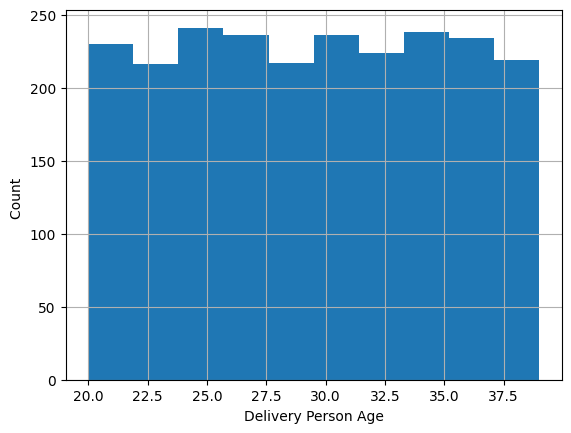

In [80]:
df_up['Delivery_person_Age'].hist()
plt.xlabel('Delivery Person Age')
plt.ylabel("Count ")
plt.show()

In [81]:
df_up['Delivery_person_Age'].describe()

count    2291.000000
mean       29.515495
std         5.730033
min        20.000000
25%        25.000000
50%        30.000000
75%        35.000000
max        39.000000
Name: Delivery_person_Age, dtype: float64

In [82]:
df_up['Delivery_person_Ratings'].unique()

array([4.9, 4.5, 4.4, 4.6, 4.7, 4.8, 5. , 4.2, 4.3, 3.9, 4. , 3.4, 4.1,
       3.5, 3.6, 3.7, 3.8, 3.3, 3.2, 2.8, 2.5, 2.9, 3. ])

In [83]:
df_up['Delivery_person_Ratings'].describe()

count    2291.000000
mean        4.626888
std         0.310714
min         2.500000
25%         4.500000
50%         4.700000
75%         4.800000
max         5.000000
Name: Delivery_person_Ratings, dtype: float64

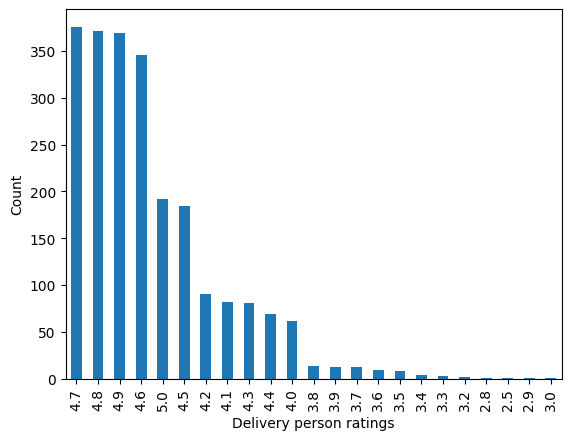

In [90]:
df_up['Delivery_person_Ratings'].value_counts().plot.bar()
plt.xlabel('Delivery person ratings')
plt.ylabel('Count')
plt.show()

In [84]:
df_up['Weatherconditions'].unique()

array([4, 3, 6, 2, 1, 0])

In [85]:
df_up['Weatherconditions'].describe()

count    2291.000000
mean        2.634657
std         1.962888
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         6.000000
Name: Weatherconditions, dtype: float64

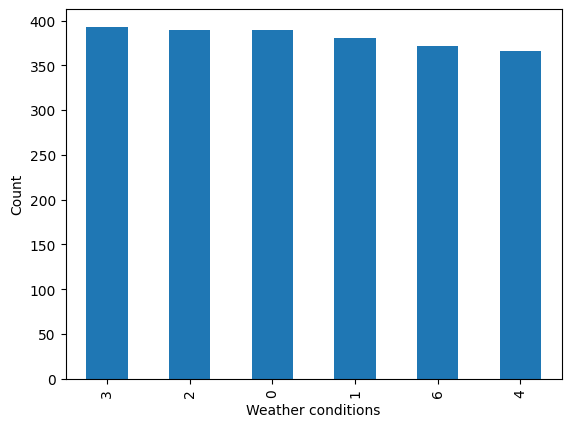

In [89]:
df_up['Weatherconditions'].value_counts().plot.bar()
plt.xlabel('Weather conditions')
plt.ylabel('Count')
plt.show()

In [91]:
df_up['Road_traffic_density'].describe()

count    2291.000000
mean        1.689655
std         0.943918
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: Road_traffic_density, dtype: float64

In [92]:
df_up['Road_traffic_density'].value_counts()

Road_traffic_density
2    762
1    754
3    531
0    244
Name: count, dtype: int64

In [93]:
df_up['Vehicle_condition'].describe()

count    2291.000000
mean        0.969446
std         0.816816
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Vehicle_condition, dtype: float64

In [94]:
# Removing the colon from time variables so that they can be converted to numerical data
df_up['Time_Orderd']=df_up['Time_Orderd'].str.replace(':', '', regex=False)
df_up['Time_Orderd']=df_up['Time_Orderd'].astype('float64')

In [95]:
df_up['Time_Order_picked']=df_up['Time_Order_picked'].str.replace(':', '', regex=False)
df_up['Time_Order_picked']=df_up['Time_Order_picked'].astype('float64')

In [96]:
df_up.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,1,0x4607_x,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,1130.0,1145.0,4,0,2,3,3,0.0,1,3,24.0
1,2,0xb379_x,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,1945.0,1950.0,3,1,2,3,4,1.0,1,1,33.0
2,3,0x20f7_x,BANGRES18DEL01,37,4.4,12.913041,77.683237,12.953041,77.723237,1350.0,1355.0,6,0,0,0,3,2.0,1,1,42.0
3,4,0x7804_x,HYDRES13DEL02,28,4.9,17.431477,78.400350,17.451477,78.420350,1060.0,1115.0,2,2,1,2,4,1.0,1,3,19.0
4,5,0x7faf_x,RANCHIRES07DEL01,37,4.6,23.359407,85.325055,23.429407,85.395055,2350.0,2360.0,3,2,0,2,3,1.0,1,1,25.0


In [97]:
df_up.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2291 entries, 0 to 2441
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   2291 non-null   int64  
 1   ID                           2291 non-null   object 
 2   Delivery_person_ID           2291 non-null   object 
 3   Delivery_person_Age          2291 non-null   int64  
 4   Delivery_person_Ratings      2291 non-null   float64
 5   Restaurant_latitude          2291 non-null   float64
 6   Restaurant_longitude         2291 non-null   float64
 7   Delivery_location_latitude   2291 non-null   float64
 8   Delivery_location_longitude  2291 non-null   float64
 9   Time_Orderd                  2291 non-null   float64
 10  Time_Order_picked            2291 non-null   float64
 11  Weatherconditions            2291 non-null   int64  
 12  Road_traffic_density         2291 non-null   int64  
 13  Vehicle_condition      

In [98]:
df_up['Time_difference']=df_up['Time_Order_picked']-df_up['Time_Orderd']
df_up.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Time_difference
0,1,0x4607_x,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,1130.0,...,4,0,2,3,3,0.0,1,3,24.0,15.0
1,2,0xb379_x,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,1945.0,...,3,1,2,3,4,1.0,1,1,33.0,5.0
2,3,0x20f7_x,BANGRES18DEL01,37,4.4,12.913041,77.683237,12.953041,77.723237,1350.0,...,6,0,0,0,3,2.0,1,1,42.0,5.0
3,4,0x7804_x,HYDRES13DEL02,28,4.9,17.431477,78.400350,17.451477,78.420350,1060.0,...,2,2,1,2,4,1.0,1,3,19.0,55.0
4,5,0x7faf_x,RANCHIRES07DEL01,37,4.6,23.359407,85.325055,23.429407,85.395055,2350.0,...,3,2,0,2,3,1.0,1,1,25.0,10.0


# Feature Selection
We make a separate dataset for the variables required for our purpose of determining the Time take to deliver an order. We haven't used any technique for feature selction but rather relied on our domain knowledge to decide.

In [99]:
data=df_up.reindex(columns=['Time_taken(min)','Delivery_person_Age', 'Weatherconditions','Road_traffic_density','Vehicle_condition','Delivery_person_Ratings'])
data.sort_values(by=['Time_taken(min)'], ascending=True,inplace=True)
data

,Time_taken(min),Delivery_person_Age,Weatherconditions,Road_traffic_density,Vehicle_condition,Delivery_person_Ratings
2137,10.0,28,3,3,0,4.7
23,10.0,29,3,2,1,4.9
1338,10.0,20,3,2,2,4.8
1710,10.0,22,4,0,1,4.9
81,10.0,20,4,3,2,4.7
...,...,...,...,...,...,...
973,53.0,39,2,1,0,4.4
2076,53.0,36,3,1,0,4.2
384,53.0,26,4,0,0,4.2
1727,54.0,32,1,1,0,4.9


In [100]:
data.describe()

,Time_taken(min),Delivery_person_Age,Weatherconditions,Road_traffic_density,Vehicle_condition,Delivery_person_Ratings
count,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000
mean,26.622436,29.515495,2.634657,1.689655,0.969446,4.626888
std,9.358144,5.730033,1.962888,0.943918,0.816816,0.310714
min,10.000000,20.000000,0.000000,0.000000,0.000000,2.500000
25%,20.000000,25.000000,1.000000,1.000000,0.000000,4.500000
50%,26.000000,30.000000,2.000000,2.000000,1.000000,4.700000
75%,32.000000,35.000000,4.000000,2.000000,2.000000,4.800000
max,54.000000,39.000000,6.000000,3.000000,2.000000,5.000000


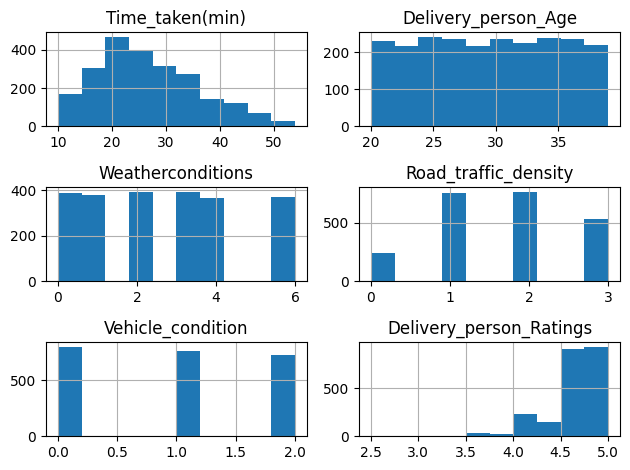

In [105]:
data.hist()
plt.tight_layout()

# Exploratory Data Analysis

In [106]:

!pip install jupyter-summarytools


In [107]:
from summarytools import dfSummary
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Time_taken(min)[float64],Mean (sd) : 26.6 (9.4)min < med < max:10.0 < 26.0 < 54.0IQR (CV) : 12.0 (2.8),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACl0lEQVR4nO3dTYriQBiA4a/GVqJCggi68wIDvXDpIeawc4RZeAJv4E4QiZjpYIzpVTcM9I/Wz1hf8T77arN4sTup+jqm6zoBYvfj0RcA3OLp0RfwFWPMUEQGlsvPXde9+LwePE60oRpjhtPp9Fee5xOb9cfj8WCM+U2saYg2VBEZ5Hk+Wa1WL0VR1PcsLMsyW6/Xk/1+PxARQk1AzKGKiEhRFPVsNvtrsXTo/WLwMNxMQQVChQqEChUIFSoQKlQgVKgQ/eMpW23b9kUkN8bY/gh2tiKSZKhVVfWbpnleLBa9Xq9312bBG3a24pJkqOfz+SnLstFyuazn8/nh3vXsbMUnyVDfjMdj210tEXa2osLNFFQgVKhAqFCBUKECoUIFQoUKhAoVCBUqJP3A34XjWQHOCXhGqB9wPSvAOQH/gobqOJefX6/Xvs/ruZXLWQHOCYQRLFTXufymabK2bX/Wdf1HRGz36504nBXgnIBnIb9RrefyRUS22+1ks9mMLpdLL8TFQZfgf6PazuUfDge+lfCOm6kAeGLgH6F6xhODMAjVM54YhEGogfDEwC+2UKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCt/u9TuMkzxslATp+TJUl3GSGEZJkI7vvlGtx0kYJYFPNx3zsxknYZQEPnEeNTK8JONjhBoRXpLxOUKNCC/J+ByhRsjlJRlt2+aS4AQsoSYk5QlYQk1IyhOwhJqgFCdg2euHCoQKFQgVKvA3Kt7FvCtGqBCR+HfFCBUiEv+uGKHiH7G+Op6bKahAqFCBX/3wJuS/hCdUeBH6QAyhwovQB2IIFV6FOhBzU6hlWWb3furpdMpERKqqyna73eh/rtf62Vqv23X9LX29Anrm0JIIDLEDAAAAAElFTkSuQmCC"">",0(0.0%)
2,Delivery_person_Age[int64],Mean (sd) : 29.5 (5.7)min < med < max:20.0 < 30.0 < 39.0IQR (CV) : 10.0 (5.2),20 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACm0lEQVR4nO3ZT27aQBiG8W/KHxlQjRAR7LhApS5YsukNethuuytSuAA3YIOQLGMEDQIMXaXKCvBMiHnJ81tn4k/mGXsS3Ol0MuDefSl7AOAa1bIHOMc51zCzuufy3el0ennPeVCeuw3VOdfodrs/4zju+KxfrVapc+7XZ4v1UTf33YZqZvU4jjuj0eil3W5viyzMsiwaj8e9JEmenHMrz+t7f2hlxRK6uZfL5do599vMCt3vN24W+sVQy96h7XZ72+v1/hZZs9lsavv9/vtgMKhUKhWvm+77RC75TeC9uefz+dfJZPJjMBg8ffQ9u8bZUFVfv7vdrhpFUXM4HG77/X5adH2WZdHz83MnSZK6mRWdPehNEHDd/3w2d5qmjRLv2UWXnqil3/QQrVar8Af2RiPk2j6xmJnleR6bWeyc87lsfDweaz4LX5V5z8656ozqe9PthoM/otAjy36/j/I8/7bdbv+YmW9s3vI8r5n/Jjt7TLzpH1OBgwc/HUIEzO49d+iRZTabdabTafNwOFR8rh8idJNdOibeLFTlp0PI7O8xt+/rN03T0t5gIZvsmmPizUJVfjqEzF7m3Pcg4Ix7dpPd/P+oik+HVz6z38Pcj4jv+iGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGhes0PZVkWFf3F6/U6MjPbbDbRYrFofuR61Wurzh26/pq+/gGVmLOwz/nS/QAAAABJRU5ErkJggg=="">",0(0.0%)
3,Weatherconditions[int64],1. 32. 23. 04. 15. 66. 4,393 (17.2%)390 (17.0%)389 (17.0%)381 (16.6%)372 (16.2%)366 (16.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAACKCAYAAAC96ziyAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACOUlEQVR4nO3bQYoaURhG0d8gTXqiiOBiXEQWm0XUbkSsQbrpiRmEXoI3guds4Dm4lFTxvs39fh8o/PjfP4DXITYyYiMjNjKbmXmfmbfovK/7/f4RncWT2R6Px1+73e5QHLau63Wz2fwW3Gva7na7w/l8/tjv95+PPOh2u/1cluVwuVzeZkZsL2g7M7Pf7z9Pp9Of4Lz34AyelBcEMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtuZf9d/Hn1QcQbPbbuu63VZlsME13/Wdb3OzNejz+E5uRZOZmOkTKV8snmqvbhs8GLsQjJ4MXZhph28GLu8OB91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNTLKusqxiJlxXWVZhg0DGuoqMJxsZ6yoy1lVkrKvI+KhLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkrKvIWFeRsUEgY11FxpONjHUVGesqMtZVZHzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsbghYxr4WQMXsh4QSBT/Y36C6VZV1lWMROsqyyr+Fatqyyr8IJAR2xkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5uHrKssqviXrKssqZlwLJ2RdRcaTjYzBCxmDFzIGL2R81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8jYIJCxriLjBYGM2MiIjcxfbxhDptKwi1oAAAAASUVORK5CYII="">",0(0.0%)
4,Road_traffic_density[int64],1. 22. 13. 34. 0,762 (33.3%)754 (32.9%)531 (23.2%)244 (10.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAA

In [ ]:
!pip install sweetviz


                                             |          | [  0%]   00:00 -> (? left)


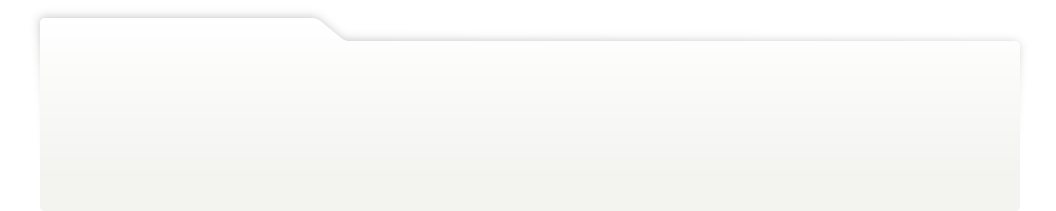
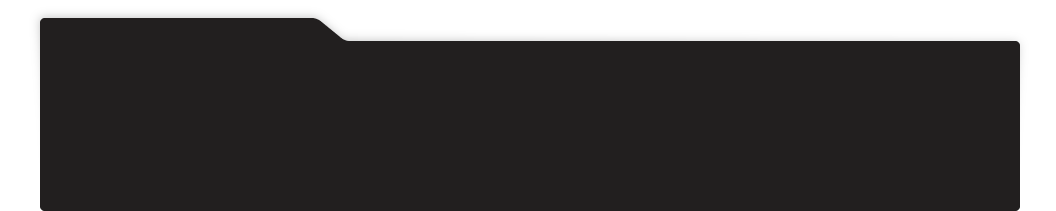
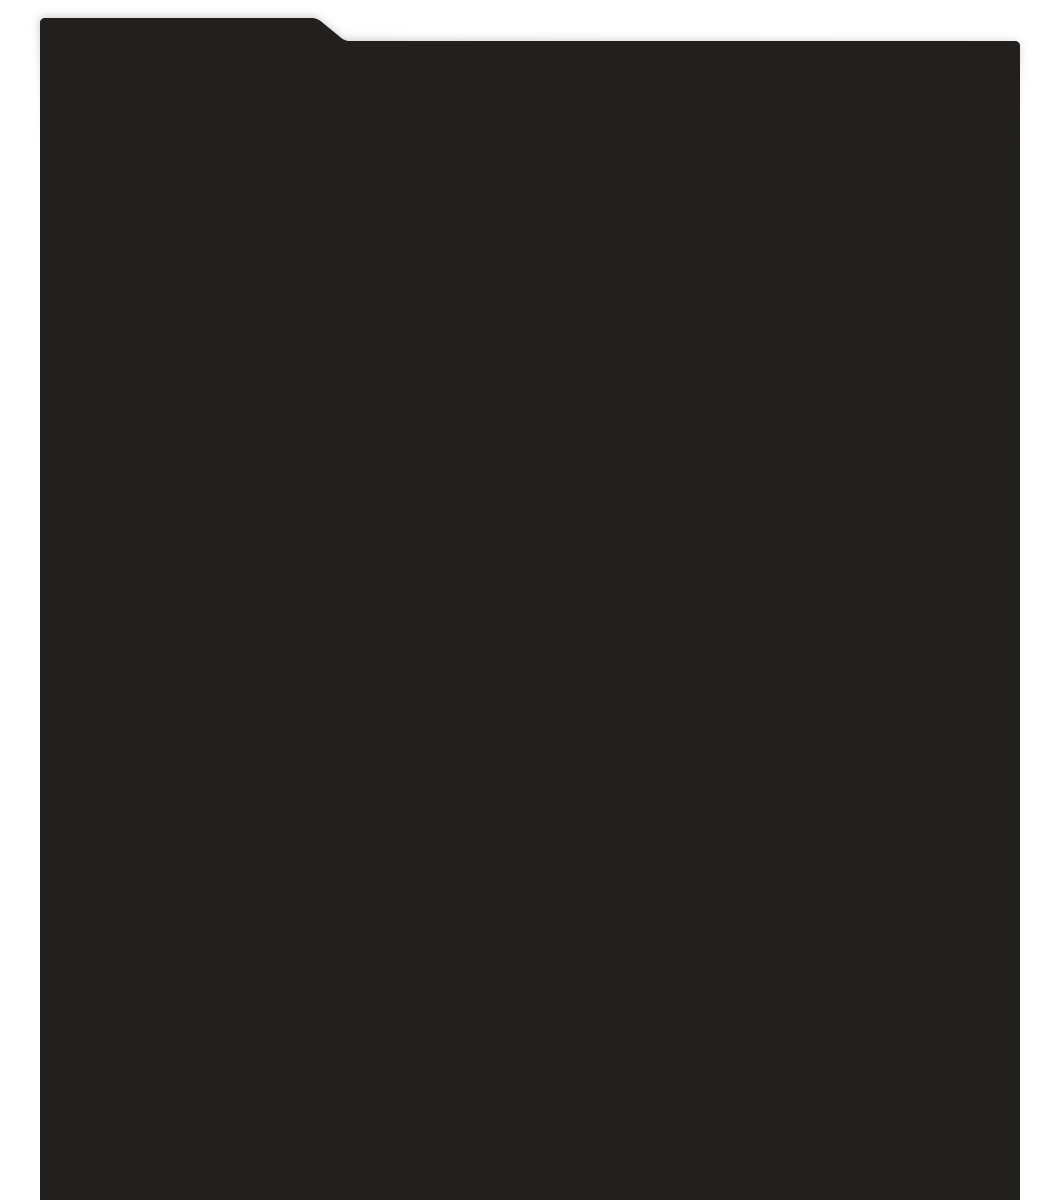
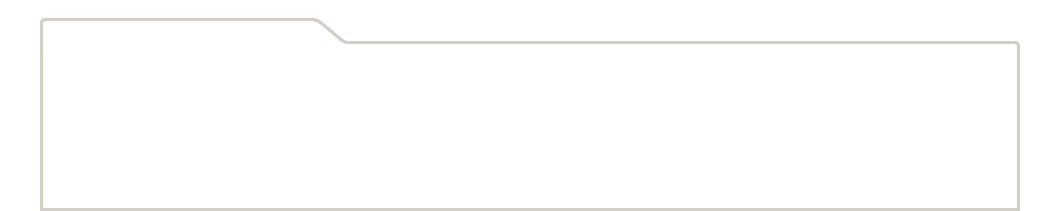
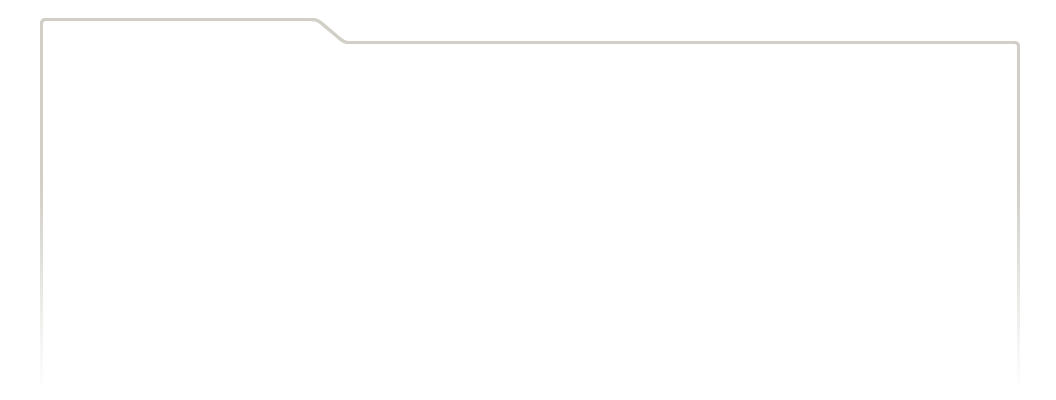
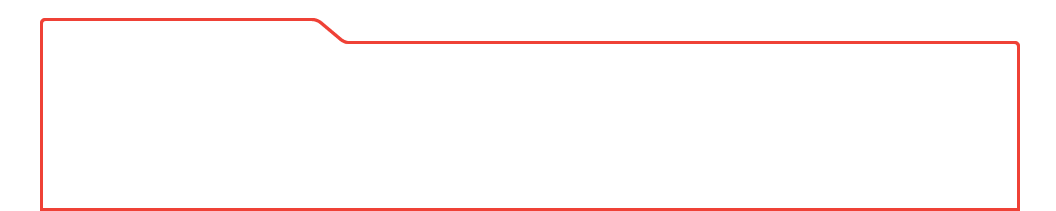
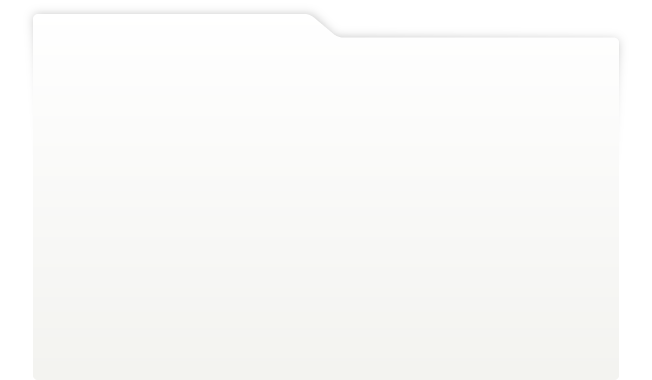
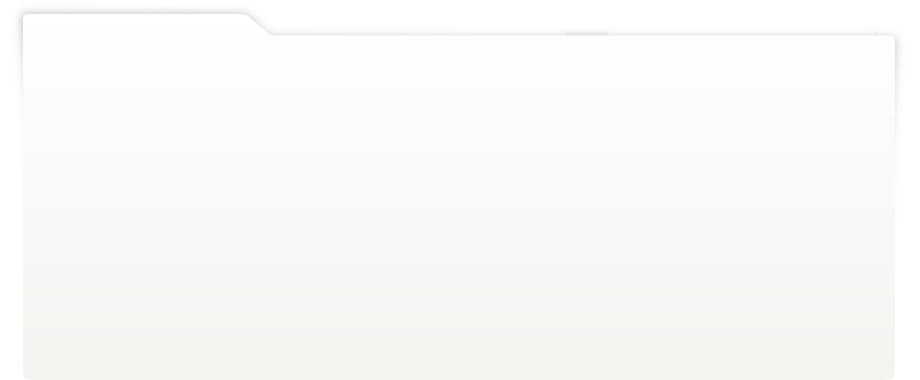
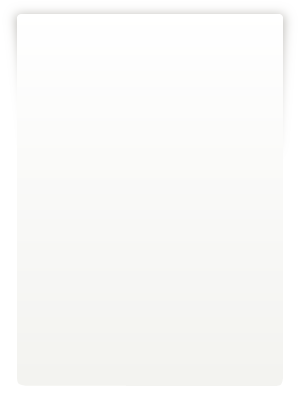
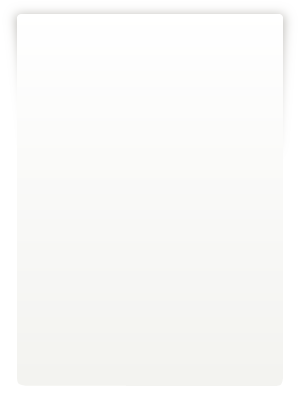
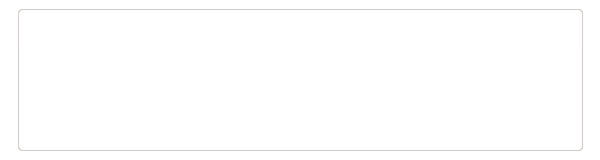
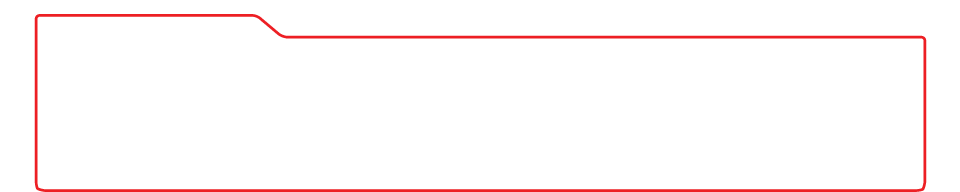
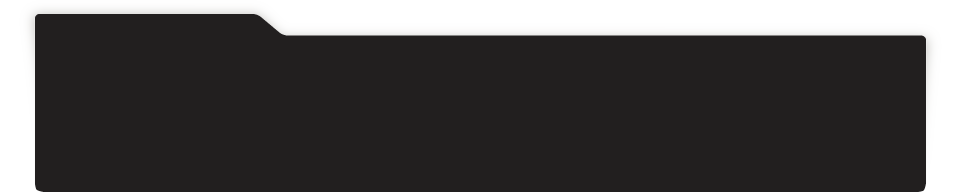
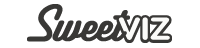
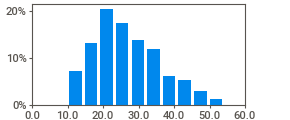
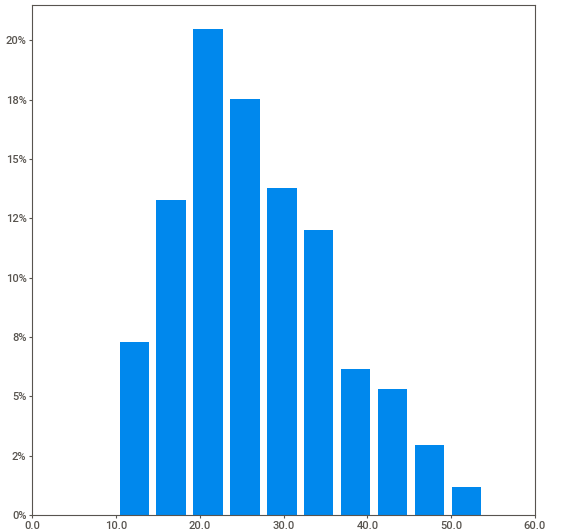
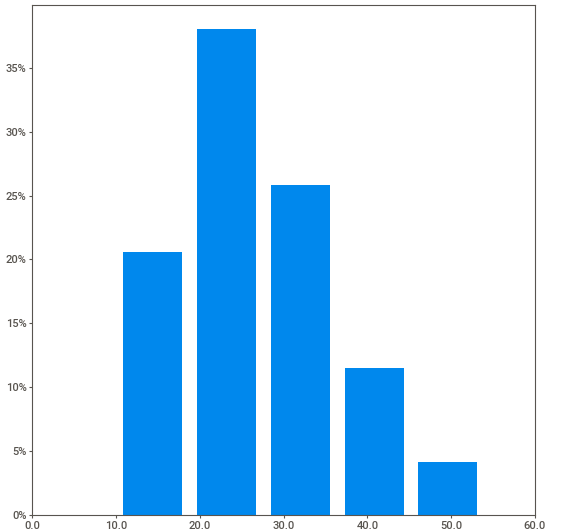
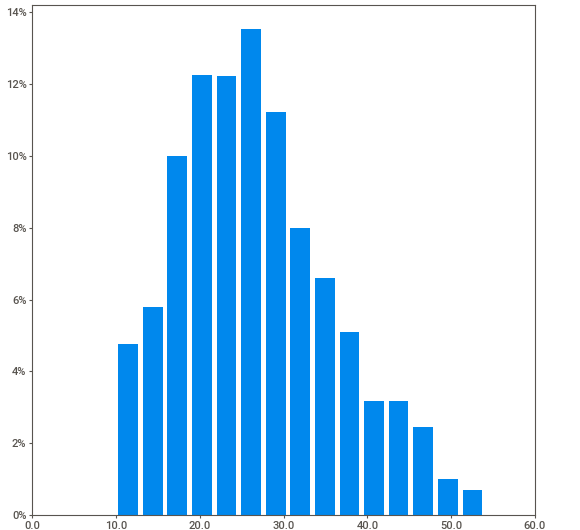
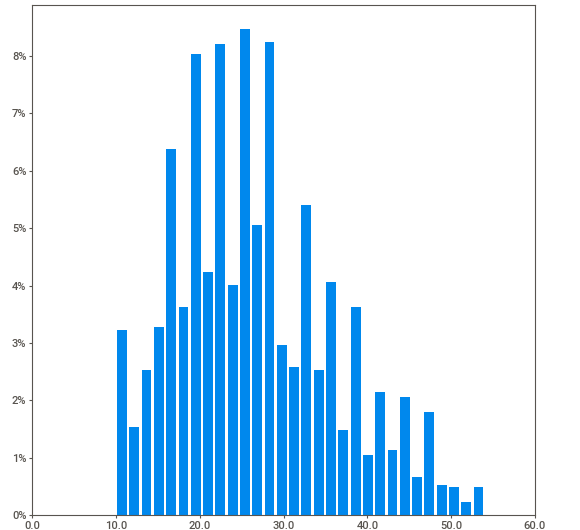
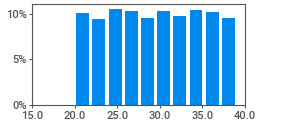
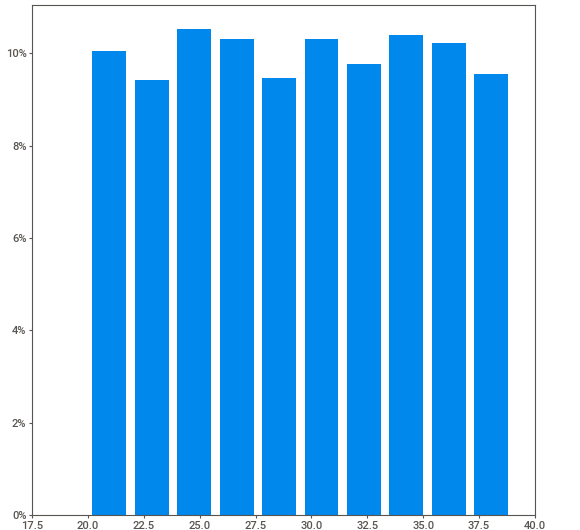
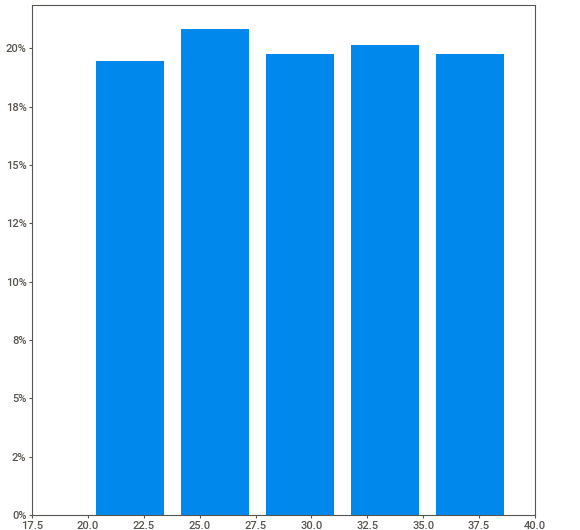
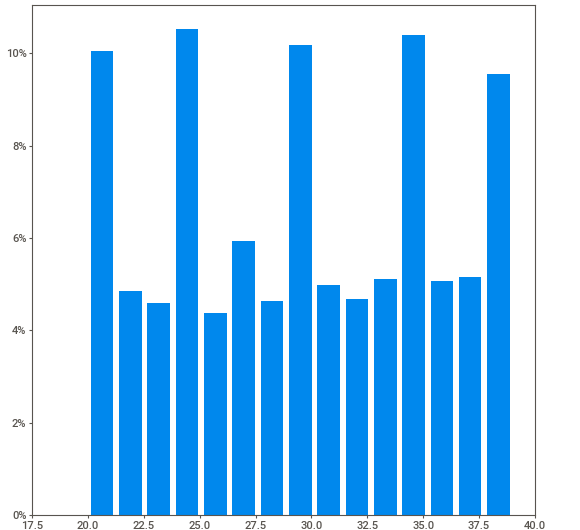
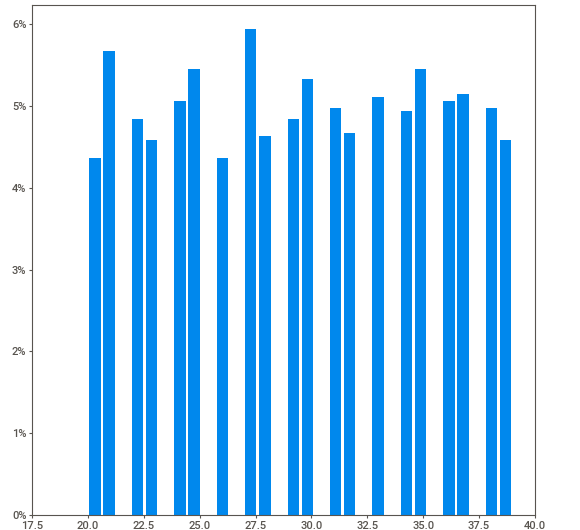
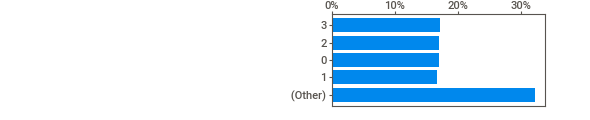
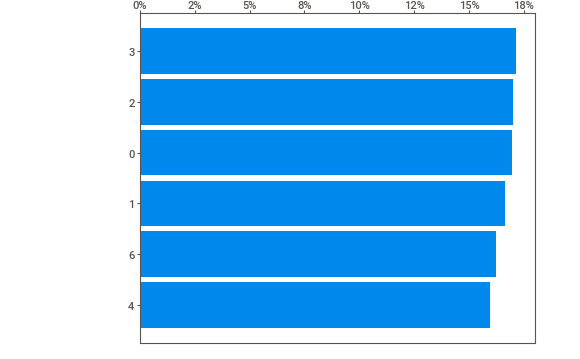
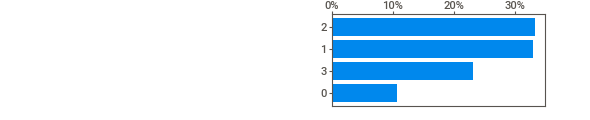
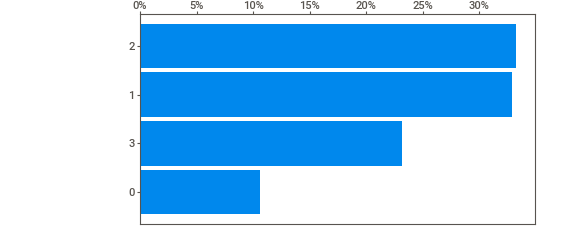
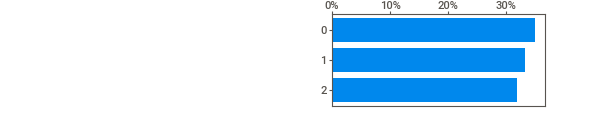
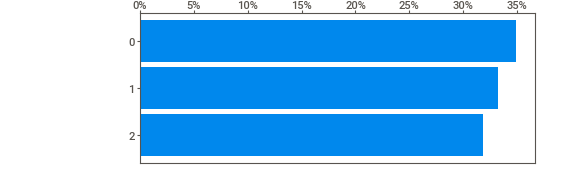
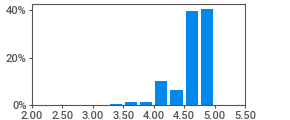
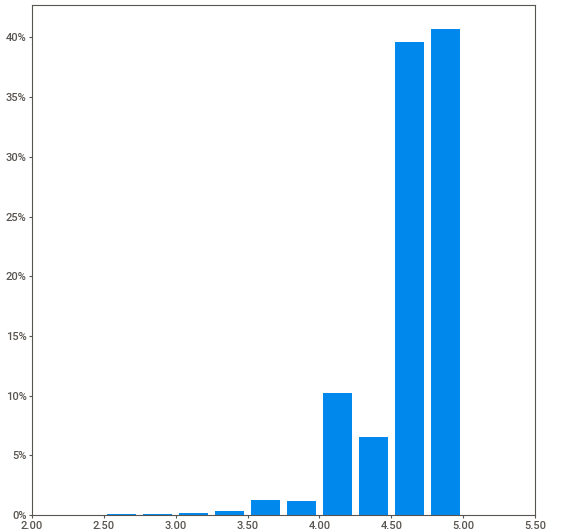
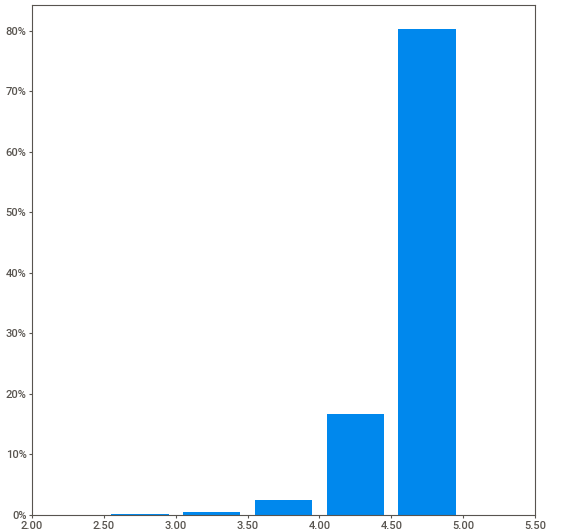
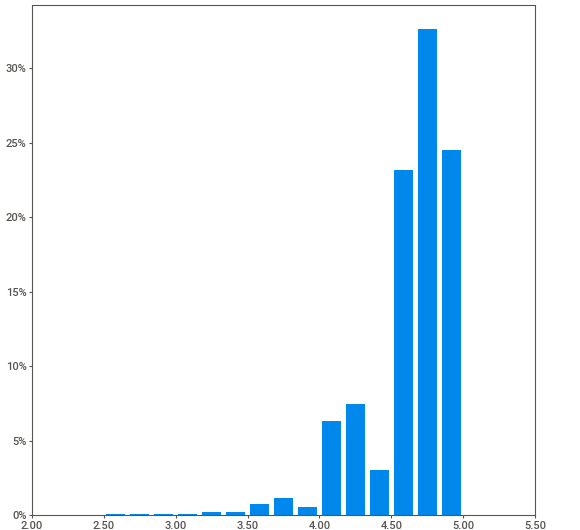
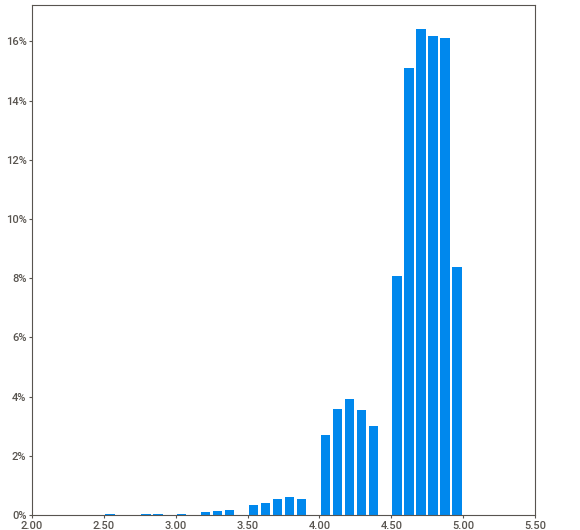
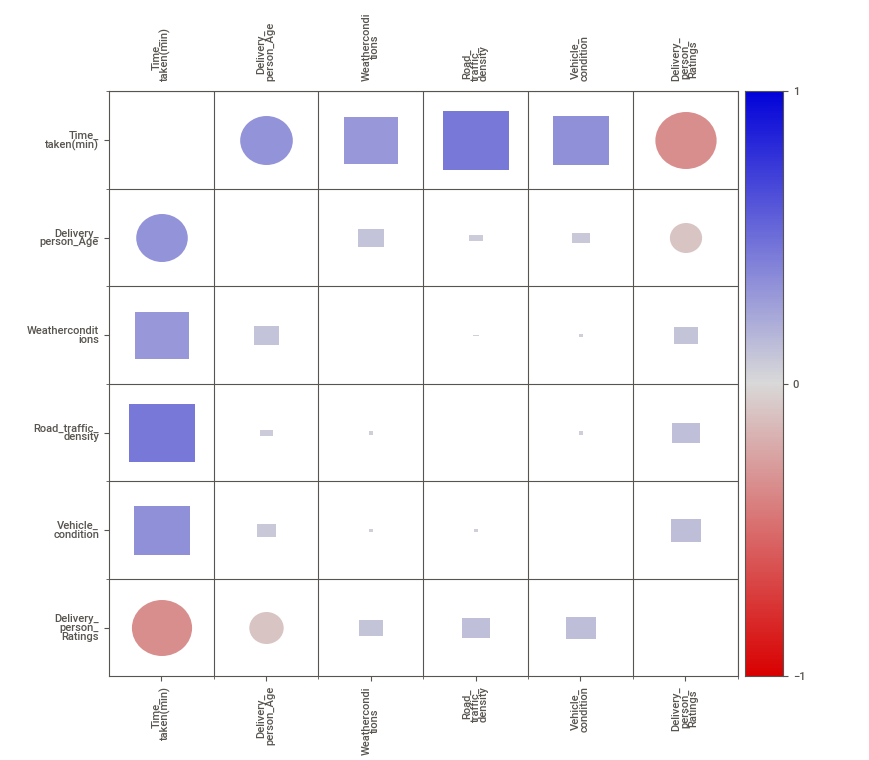
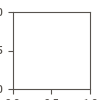

In [109]:
import sweetviz as sv

my_report = sv.analyze(data)
my_report.show_notebook(w="100%", h="full")

**Observation:**<br>
Above report shows that the **Time_taken(min)** to complete a delivery is correlated most with **Road_traffic_density**, **Vehicle_condition** and **Delivery_person_Ratings**

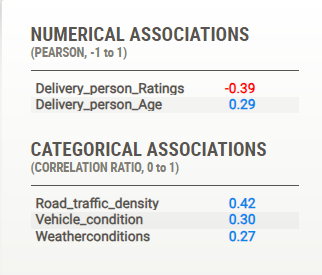<br>
Here the correlation is calculated by two ways: Pearson's correlation coefficient and Correlation Ratio.<br>
The Pearson correlation coefficient between two variables X and Y is given by:<br>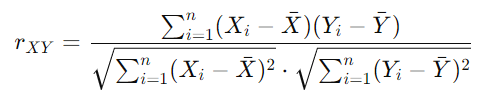<br>
This formula measures the strength and direction of a linear relationship between two continuous variables.<br>
The Correlation Ratio (η²) is used to measure the association between a categorical variable X with categories k and a continuous variable Y. It is defined as:<br>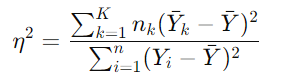<br>
This formula tells you how much of the variance in the continuous variable Y can be explained by the categorical variable X. The result is a value between 0 and 1, where higher values indicate a stronger association.




/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


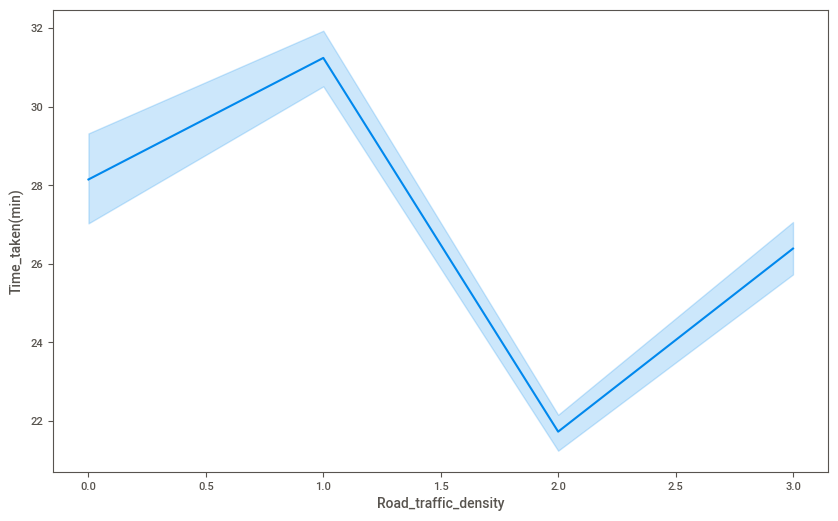

In [114]:
# plotting Road_traffic_density vs Time_taken(min)
plt.figure(figsize=(10,6))
sns.lineplot(data=data,x='Road_traffic_density', y='Time_taken(min)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


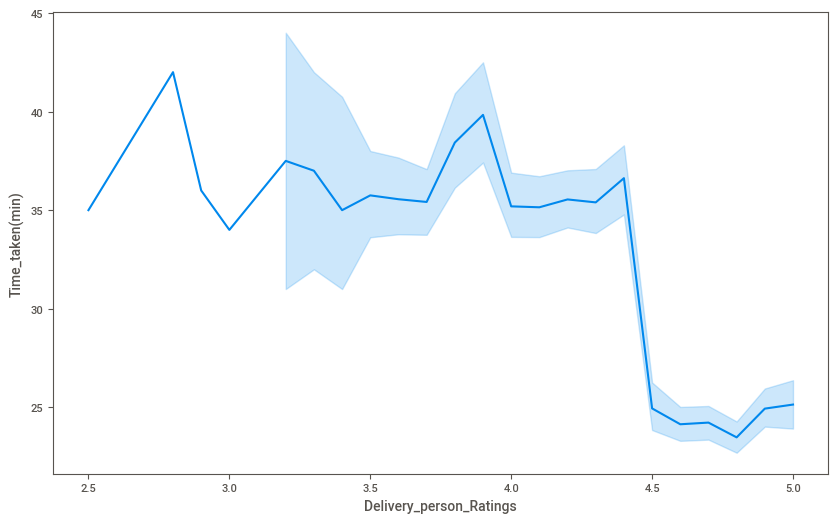

In [113]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data,x='Delivery_person_Ratings', y='Time_taken(min)')
plt.show()

# Model Formulation
We start with building a model to forecast the Time taken by delivery agents. We will start with defining our dependent and independent variables.

For the first model we only use the **Road_traffic_density** variable as the independent variable because of its high correlation with our dependent variable.

In [116]:
import statsmodels.api as sm
y = data[['Time_taken(min)']]

In [118]:
x = data[['Road_traffic_density']]
sm.add_constant(x, prepend=True) 
# There is by default no intercept term in OLS regression model by statsapi 
#hence we are introducing it on our own

,const,Road_traffic_density
2137,1.0,3
23,1.0,2
1338,1.0,2
1710,1.0,0
81,1.0,3
...,...,...
973,1.0,1
2076,1.0,1
384,1.0,0
1727,1.0,1


In [119]:
import statsmodels.api as sm

mod_log = sm.OLS(y, x)
res_log = mod_log.fit()
display(res_log.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Time_taken(min)   R-squared (uncentered):                   0.622
Model:                            OLS   Adj. R-squared (uncentered):              0.622
Method:                 Least Squares   F-statistic:                              3774.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):                        0.00
Time:                        10:23:25   Log-Likelihood:                         -9787.3
No. Observations:                2291   AIC:                                  1.958e+04
Df Residuals:                    2290   BIC:                                  1.958e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Road_traffic_density    11.5025      0.187     61.430      0.000      11.135      11.870
==============================================================================
Omnibus:                      175.770   Durbin-Watson:                   0.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.064
Skew:                           0.371   Prob(JB):                     1.13e-22
Kurtosis:                       2.288   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model has an R2 score of 0.622

Next we use the variable **Delivery_person_Ratings** as dependent variable

In [123]:
x=data[['Delivery_person_Ratings']]
sm.add_constant(x, prepend=True)

,const,Delivery_person_Ratings
2137,1.0,4.7
23,1.0,4.9
1338,1.0,4.8
1710,1.0,4.9
81,1.0,4.7
...,...,...
973,1.0,4.4
2076,1.0,4.2
384,1.0,4.2
1727,1.0,4.9


In [124]:
mod_log = sm.OLS(y, x)
res_log = mod_log.fit()
display(res_log.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Time_taken(min)   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                          1.529e+04
Date:                Wed, 14 Aug 2024   Prob (F-statistic):                        0.00
Time:                        10:25:59   Log-Likelihood:                         -8568.1
No. Observations:                2291   AIC:                                  1.714e+04
Df Residuals:                    2290   BIC:                                  1.714e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Delivery_person_Ratings     5.6749      0.046    123.642      0.000       5.585       5.765
==============================================================================
Omnibus:                      118.023   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.268
Skew:                           0.544   Prob(JB):                     6.29e-28
Kurtosis:                       2.642   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model has R2 score of 0.870 which means it performed better than the previous mdodel.

Next, we tke the variable **Vehicle_condition** as the dependent variable.

In [125]:
x=data[['Vehicle_condition']]
sm.add_constant(x, prepend=True)

,const,Vehicle_condition
2137,1.0,0
23,1.0,1
1338,1.0,2
1710,1.0,1
81,1.0,2
...,...,...
973,1.0,0
2076,1.0,0
384,1.0,0
1727,1.0,0


In [126]:
mod_log = sm.OLS(y, x)
res_log = mod_log.fit()
display(res_log.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Time_taken(min)   R-squared (uncentered):                   0.444
Model:                            OLS   Adj. R-squared (uncentered):              0.444
Method:                 Least Squares   F-statistic:                              1832.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):                   1.30e-294
Time:                        10:27:24   Log-Likelihood:                         -10229.
No. Observations:                2291   AIC:                                  2.046e+04
Df Residuals:                    2290   BIC:                                  2.047e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Vehicle_condition    14.8413      0.347     42.802      0.000      14.161      15.521
==============================================================================
Omnibus:                      160.115   Durbin-Watson:                   0.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.683
Skew:                           0.222   Prob(JB):                     4.48e-16
Kurtosis:                       2.263   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model has an R2 score of 0.444 whic means it performed the worst out of all three.

# Linear Regression
We will now build a linear regression model using OLS (Ordinary Least Square) as the loss function. This time we use all the variables in **data** to formulate the model.

In [128]:
y = data[['Time_taken(min)']]

In [129]:
x=data[['Delivery_person_Age', 'Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Delivery_person_Ratings']]
sm.add_constant(x, prepend=True)

,const,Delivery_person_Age,Weatherconditions,Road_traffic_density,Vehicle_condition,Delivery_person_Ratings
2137,1.0,28,3,3,0,4.7
23,1.0,29,3,2,1,4.9
1338,1.0,20,3,2,2,4.8
1710,1.0,22,4,0,1,4.9
81,1.0,20,4,3,2,4.7
...,...,...,...,...,...,...
973,1.0,39,2,1,0,4.4
2076,1.0,36,3,1,0,4.2
384,1.0,26,4,0,0,4.2
1727,1.0,32,1,1,0,4.9


In [130]:
mod_log = sm.OLS(y, x)
res_log = mod_log.fit()
display(res_log.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Time_taken(min)   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                              4321.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):                        0.00
Time:                        10:33:02   Log-Likelihood:                         -8214.6
No. Observations:                2291   AIC:                                  1.644e+04
Df Residuals:                    2286   BIC:                                  1.647e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Delivery_person_Age         0.7166      0.029     24.673      0.000       0.660       0.774
Weatherconditions          -0.6252      0.093     -6.732      0.000      -0.807      -0.443
Road_traffic_density       -1.6882      0.194     -8.724      0.000      -2.068      -1.309
Vehicle_condition          -2.4916      0.224    -11.104      0.000      -2.932      -2.052
Delivery_person_Ratings     2.6240      0.207     12.690      0.000       2.218       3.029
==============================================================================
Omnibus:                       80.272   Durbin-Watson:                   0.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.836
Skew:                           0.466   Prob(JB):                     1.39e-19
Kurtosis:                       2.801   Cond. No.                         41.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With an R2 score of 0.904, this model outperforms the others 

In [ ]:
# splitting the data into training and testing set leaving 20% for testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [ ]:
mod_log = sm.OLS(y_train, X_train)
res_log = mod_log.fit()
display(res_log.summary())

In [ ]:
from sklearn.metrics import r2_score
y_pred=res_log.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

We will now try other methods to build a model. This should help us choose the best model for our problem.

# Random Forest 
This regression method lets us capture the non-linear relationships in our data and automatically does the feature selection for us.

In [132]:
x=data[['Delivery_person_Age', 'Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Delivery_person_Ratings']]
y = data[['Time_taken(min)']]


In [133]:
# importing necessary lbraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [134]:
# splitting the data into training and testing set leaving 20% for testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [141]:
regr = RandomForestRegressor(max_depth = 8, random_state=0)
regr.fit(X_train,np.array( y_train).reshape(len(y_train),))

RandomForestRegressor(max_depth=8, random_state=0)

In [142]:
y_pred = regr.predict(X_test)

In [143]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 32.71849439896831
R-squared: 0.6228591701093074


## Using GridSearchCV for hyperparameter tuning
We are looking to improve the accuracy of our Random Forest model. One of the methods to do this is to tune the hyperparameters of the model. Instead of doing it manually we will make use of GridSearchCV function of scikit learn. This function performs a grid search over hyperparameter values and gives the ones which result in the best model in terms of accuracy.

In [230]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = RandomForestRegressor(random_state=0)

# Define the parameter grid
param_grid = {
    'n_estimators': [50,75, 100, 150],  # Number of trees in the forest
    'max_depth': [None,5, 10, 15, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [5,8,9,10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2,3],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,  # Number of cross-validation folds
                           scoring='r2',  # Metric to optimize
                           n_jobs=-1,  # Use all available cores
                           verbose=0)  # Print progress


grid_search.fit(X_train, np.array( y_train).reshape(len(y_train),))


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")


y_pred = best_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error: 31.946809280350244
R^2 Score: 0.6317542605282324


# Decision Trees

Decision trees are a type of supervised learning algorithm used for both classification and regression tasks. They model decisions and their possible consequences as a tree-like structure, which is helpful for making predictions and understanding how decisions are made.

In [148]:
# splitting the data into training and testing set leaving 20% for testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [149]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(random_state=0)
clf = clf.fit(X_train, np.array(y_train).reshape(len(y_train),))
y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.40261338711186423


# Gradient Boosting Regressor 
Gradient Boosting Regressor is a machine learning technique used for regression tasks, which involves building an ensemble of weak prediction models, typically decision trees, in a sequential manner. Each subsequent model attempts to correct the errors made by the previous models, improving the overall predictive performance.

In [150]:
from sklearn.ensemble import GradientBoostingRegressor  # For regression tasks
from sklearn.ensemble import GradientBoostingClassifier  # For classification tasks
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


In [151]:

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)


model.fit(X_train, np.array(y_train).reshape(len(y_train),))


GradientBoostingRegressor(random_state=0)

In [152]:
y_pred = model.predict(X_test)


In [153]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 32.70084962567773
R-squared: 0.6230625585770313


Using **GrdiSearchCV** to fine-tune the model to improve accuracy.

In [231]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


model = GradientBoostingRegressor(random_state=0)


param_grid = {
    'n_estimators': [50,100, 125, 150],
    'learning_rate': [0.01, 0.1, 0.2,0.3,0.4,0.5],
    'max_depth': [3, 4, 5,8,9]
}


grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,  # Number of cross-validation folds
                           scoring='r2',  # Metric to optimize
                           n_jobs=-1,  # Use all available cores
                           verbose=0)  # Print progress

grid_search.fit(X_train, np.array(y_train).reshape(len(y_train),))


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")





Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}


In [232]:
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 32.465863833963304
R-squared: 0.6257712020561302


# Neural networks 
Neural networks are powerful tools for regression tasks, capable of modeling complex and non-linear relationships between input features and continuous target variables.

In [ ]:
!pip install tensorflow


In [234]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [235]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [173]:
model = Sequential()


model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(1))  # For regression; use activation='sigmoid' for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error')  # Use 'binary_crossentropy' for binary classification


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [174]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=100,  # Number of epochs
                    batch_size=32,  # Batch size
                    validation_split=0.2,  # Fraction of data to reserve for validation
                    verbose=0)


In [175]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")

# Predict and compare with actual values
y_pred = model.predict(X_test)


Test Loss: 36.25306701660156
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


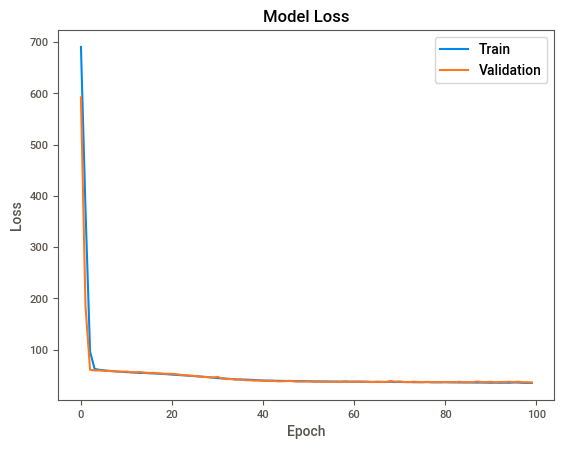

In [176]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [177]:
from sklearn.metrics import r2_score


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R^2 Score: 0.5821167065004534


In [236]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the model
model = Sequential()

# Input and hidden layers with dropout and batch normalization
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# # Add additional hidden layers if necessary
# model.add(Dense(32, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))

# Output layer
model.add(Dense(1))  # For regression; use activation='sigmoid' for binary classification

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model with callbacks
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, checkpoint])


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 795.1935 - val_loss: 804.7808
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 726.2845 - val_loss: 774.1895
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 687.3013 - val_loss: 726.2017
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 646.2236 - val_loss: 663.7215
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 574.5854 - val_loss: 579.5200
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 491.8318 - val_loss: 482.5471
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 391.6927 - val_loss: 381.5586
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 304.5719 - val_loss: 285.6909
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 232.3684 - val_loss: 206.1485
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 173.3525 - val_loss: 141.5889
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 118.8999 - val_loss: 100.6953
Epoch 12/100
46/46 ━━━━━━━━━━━━

In [237]:
from sklearn.metrics import r2_score


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R^2 Score: 0.5728551341956551


# Results

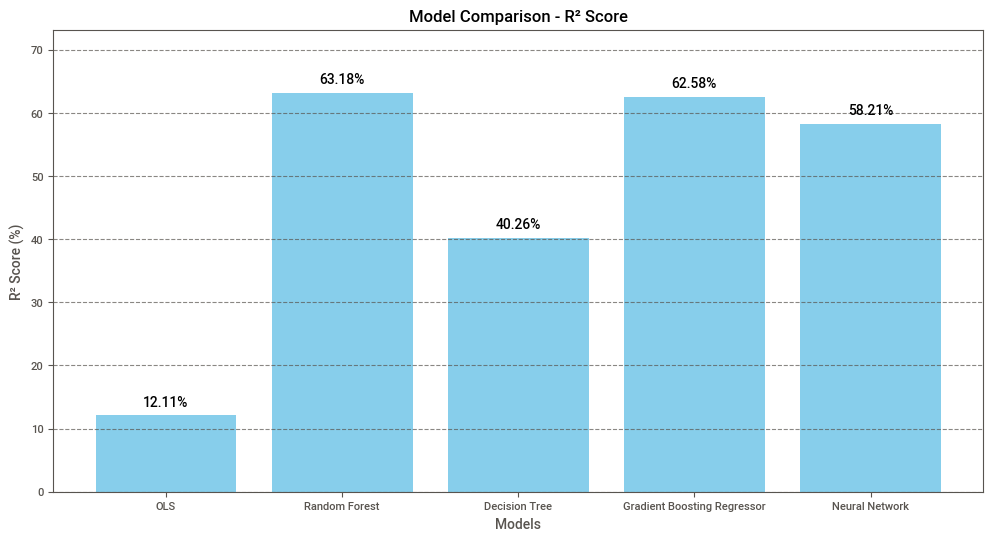

In [238]:
import matplotlib.pyplot as plt

# Model names and their corresponding R² scores
models = ['OLS', 'Random Forest', 'Decision Tree', 'Gradient Boosting Regressor', 'Neural Network']
accuracies = [12.112609991917778, 63.17542605282324, 40.261338711186423, 62.57712020561302, 58.21167065004534]

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies, color='skyblue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('R² Score (%)')
plt.title('Model Comparison - R² Score')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.ylim(0, max(accuracies) + 10)  # Adding some space above the highest bar
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


Hence, Random Forest Regression model perform the best and can be used to forecast the delivery time